1. 로지스틱 회귀
- 선형함수($WX + b$)에 시그모이드($\sigma$)를 씌운 것
- 선형함수에 의해 계산된 값으 0이나 1로 분류 되어질 확률을 구할 수 있다.
2. LinearSVC
- SVM을 기반으로 각 특성의 차원을 늘려서 수학적인 기교를 통해 분류하는 방식


In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=b6f36aafa4c6e1e53fe40be1abcf031756fa8fe13d49995b681f80e93cea3470
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


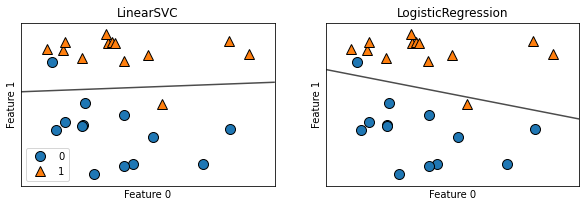

In [2]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
axes[0].legend()
plt.show()

In [3]:
# 위쪽 : 주황색 세모
# 아래쪽 : 파랑색 동그라미

# 선을 위한 기울기. 가중치에 대한 이야기 더 할 수 있음

# 아까와는 반대임
# 회귀에서는 alpha 사용했는데
# 여기서는 규제를 조절하는 c를 사용

규제를 조절하는 c를 사용해서 가중치를 조절한다.

모델의 규제의 강도를 줄이거나 늘릴 수 있다.
- c, 가중치 비례 관계
- c 증가 -> 규제 감소 -> 가중치 증가 -> 복잡도 증가
- c 감소 -> 규제 증가 -> 가중치 감소 -> 복잡도 감소

규제를 규제한다..

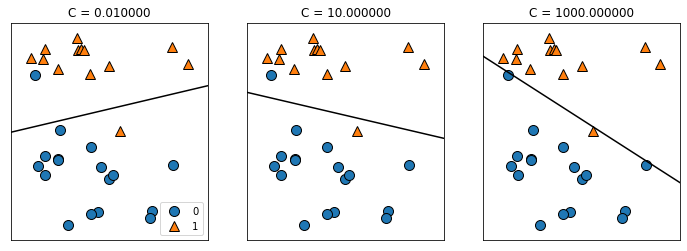

In [4]:
mglearn.plots.plot_linear_svc_regularization()

In [5]:
# mglearn에 있는 내용을 시각화
# 잘못 분류되는 것 무시하고 전체적인 추세만 파악. 데이터에 대한 복잡도 낮음. 가중치가 영향을 미치는 영향이 데이터 포인트에 비해 낮음.
# c가 1000배가 되니까 (0.01 -> 10) 점점 잘못 분류된 데이터 포인트들 신경씀 -> 과대적합이 되어가고있음
# c=1000 추세같은 것들 고려하지 않고 모든 데이터 포인트를 구분하기 위해 노력함
# c 증가 -> 복잡도 증가
# c 감소 -> 복잡도 감소

유방암 데이터셋 분류하기

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target, # 계층 분할 대상
                                                    random_state=42)
log_reg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("훈련 세트 점수 :{:.6f}".format(log_reg.score(X_train,y_train)))
print("테스트 세트 점수 :{:.6f}".format(log_reg.score(X_test,y_test)))

훈련 세트 점수 :0.957746
테스트 세트 점수 :0.958042


In [7]:
log_reg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
print("훈련 세트 점수 :{:.6f}".format(log_reg100.score(X_train,y_train)))
print("테스트 세트 점수 :{:.6f}".format(log_reg100.score(X_test,y_test)))

훈련 세트 점수 :0.981221
테스트 세트 점수 :0.965035


In [8]:
# 데이터에 대해 모델이 약간 복잡해도 될 것 같다.
# 복잡해도 나쁘지 않은 데이터? -> 분류가 깔끔하게 잘 되어있는 데이터.
# 분류가 잘못 되어있는 데이터 포인트들이 잘못되어있는 게 적을 경우.

In [9]:
log_reg001 = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("훈련 세트 점수 :{:.6f}".format(log_reg001.score(X_train,y_train)))
print("테스트 세트 점수 :{:.6f}".format(log_reg001.score(X_test,y_test)))

훈련 세트 점수 :0.953052
테스트 세트 점수 :0.951049


In [10]:
# 아까보단 과소적합인데
# 지금 분류가 잘 되어있는 데이터라 별 차이 없음
# 이럴 때, 노이즈(안 좋은 데이터)가 필요함. 그래야 문제 잘 풀 수 있음.

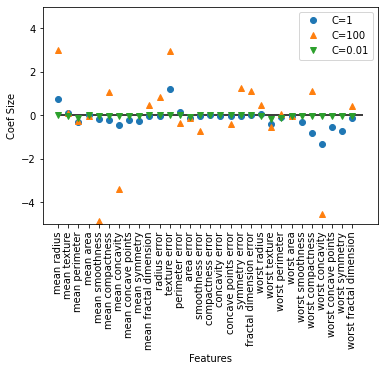

In [11]:
plt.plot(log_reg.coef_.T, 'o', label="C=1")
plt.plot(log_reg100.coef_.T, '^', label="C=100")
plt.plot(log_reg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Features")
plt.ylabel("Coef Size")
plt.legend()